Generation 0: Best Fitness = 2.5038183229424875e-05, Route = [30, 39, 28, 40, 36, 26, 12, 43, 14, 47, 8, 44, 16, 32, 20, 2, 31, 9, 0, 22, 34, 18, 10, 19, 41, 37, 7, 13, 3, 29, 1, 6, 45, 21, 4, 15, 42, 33, 38, 46, 24, 5, 35, 23, 11, 25, 27, 17]
Generation 100: Best Fitness = 2.3804422861767718e-05, Route = [0, 10, 15, 40, 28, 37, 46, 9, 19, 20, 4, 45, 27, 24, 17, 33, 2, 42, 29, 25, 23, 14, 39, 7, 3, 1, 11, 41, 47, 34, 12, 36, 5, 35, 26, 31, 13, 30, 18, 32, 22, 44, 16, 21, 38, 43, 8, 6]
Generation 200: Best Fitness = 2.36607987885671e-05, Route = [29, 32, 36, 12, 35, 34, 43, 40, 14, 22, 11, 3, 37, 8, 26, 17, 39, 28, 2, 16, 41, 23, 10, 38, 25, 19, 44, 1, 5, 46, 0, 7, 20, 33, 9, 45, 4, 27, 21, 30, 13, 24, 47, 42, 31, 15, 18, 6]
Generation 300: Best Fitness = 2.50557490416176e-05, Route = [24, 31, 15, 23, 30, 10, 40, 43, 20, 3, 22, 18, 5, 12, 29, 39, 2, 19, 21, 1, 25, 7, 35, 26, 38, 0, 4, 14, 11, 32, 28, 36, 37, 41, 46, 45, 8, 27, 42, 34, 17, 9, 33, 13, 6, 44, 47, 16]
Generation 400: Best F

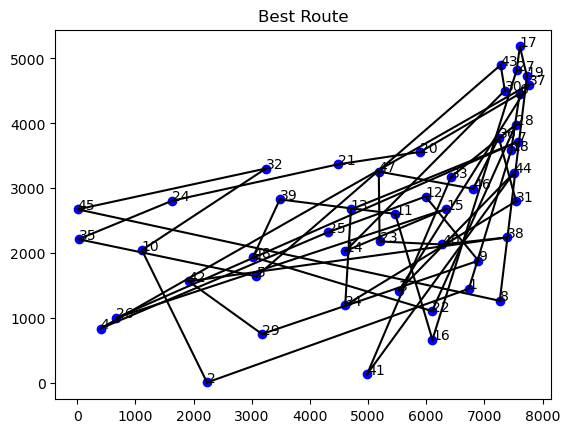

In [1]:
import numpy as np
import random
import tsplib95
import networkx
import matplotlib.pyplot as plt

problem = tsplib95.load ('att48.tsp')

distance_matrix = np.array(networkx.to_numpy_matrix(problem.get_graph()))
num_cities = len(distance_matrix)
population_size = 100
num_generations = 1000
mutation_rate = 0.05

# Evaluation function
def calculate_total_distance(route):
    return sum(distance_matrix[route[i], route[i + 1]] for i in range(num_cities - 1)) + distance_matrix[route[-1], route[0]]

# Selection function (Roulette Wheel Selection)
def roulette_wheel_selection(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    relative_fitness = [f / total_fitness for f in fitness_scores]
    cumulative_prob = [sum(relative_fitness[:i+1]) for i in range(len(relative_fitness))]
    selected_parents = []
    for _ in range(len(population)):
        r = random.random()
        for i, individual in enumerate(population):
            if r <= cumulative_prob[i]:
                selected_parents.append(individual)
                break
    return selected_parents

# Crossover function (Ordered Crossover)
def ordered_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child1 = [None]*size
    child1[start:end+1] = parent1[start:end+1]
    child2 = [None]*size
    child2[start:end+1] = parent2[start:end+1]
    child1 = fill_none(child1, parent2, start, end)
    child2 = fill_none(child2, parent1, start, end)
    return child1, child2

def fill_none(child, parent, start, end):
    size = len(child)
    filled_idx = (end + 1) % size
    parent_idx = (end + 1) % size
    while None in child:
        if parent[parent_idx] not in child:
            child[filled_idx] = parent[parent_idx]
            filled_idx = (filled_idx + 1) % size
        parent_idx = (parent_idx + 1) % size
    return child

# Mutation function (Swap Mutation)
def swap_mutation(route):
    mutated_route = route.copy()
    for i in range(len(mutated_route)):
        if random.random() < mutation_rate:
            swap_with = random.randint(0, len(mutated_route) - 1)
            mutated_route[i], mutated_route[swap_with] = mutated_route[swap_with], mutated_route[i]
    return mutated_route

def plot_route(route, problem):
    # Extract the coordinates for each city
    nodes = list(problem.get_nodes())
    coords = {node: problem.node_coords[node] for node in nodes}
    
    # Plot each city
    for node, (x, y) in coords.items():
        plt.plot(x, y, 'o', color='blue')
        plt.text(x, y, str(node), color='black')
    
    # Draw lines for the route
    for i in range(-1, len(route) - 1):
        # Adjust the node index if necessary
        node1 = route[i]
        node2 = route[i + 1]
        if 0 not in coords:  # Adjust if nodes are indexed from 1
            node1 += 1
            node2 += 1
        
        x1, y1 = coords[node1]
        x2, y2 = coords[node2]
        plt.plot([x1, x2], [y1, y2], 'k-')
    
    plt.title('Best Route')
    plt.show()


# Initialization
population = [np.random.permutation(num_cities) for _ in range(population_size)]

# Genetic Algorithm
for generation in range(num_generations):
    fitness_scores = [1 / calculate_total_distance(individual) for individual in population]
    parents = roulette_wheel_selection(population, fitness_scores)
    offspring = []
    for i in range(0, len(parents), 2):
        for child in ordered_crossover(parents[i], parents[(i + 1) % len(parents)]):
            offspring.append(swap_mutation(child))
    population = offspring

    if generation % 100 == 0:
        best_fitness = max(fitness_scores)
        best_route = population[fitness_scores.index(best_fitness)]
        print(f"Generation {generation}: Best Fitness = {best_fitness}, Route = {best_route}")

# Extract the best solution
best_fitness = max(fitness_scores)
best_route = population[fitness_scores.index(best_fitness)]
best_distance = 1 / best_fitness
print(f"Best Route: {best_route}")
print(f"Best Distance: {best_distance}")
plot_route(best_route, problem)


In [ ]:
5